In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Load dataset

In [ ]:
df = pd.read_stata("../data.dta")
print(df.shape)

(66215, 1239)


##### Hip patients are excluded (Exclusion of patients was either the patient did not register the knee as a primary joint) (ptb_3754)

In [6]:
def knee_pain(df):
    df_knee_pain = df[(df['ptb_3754'] == 5.0) | (df['ptb_3754'] == 6.0)];
    return df_knee_pain

df = knee_pain(df)
print(df.shape)

(40411, 1239)


##### Exclusion of patients registered their baseline characteristics (ptb_3750) before the 09th of October 2014

In [7]:
def filter_date_basedOn_ptb_3750(df):
    cut_date = pd.DataFrame(data={'a': ['2014-10-09']})
    cut_date = cut_date.a.astype('datetime64[ns]').values[0]
    filtered_df = df[(df['ptb_3750'].astype('datetime64[ns]') < cut_date)].index
    return df.drop(index = filtered_df)

df = filter_date_basedOn_ptb_3750(df)
print(df.shape)

(38547, 1239)


### adding outcome variables and remove cases with missing outcome:  

##### VAS change in pain score

ptb_3564 null is:  26


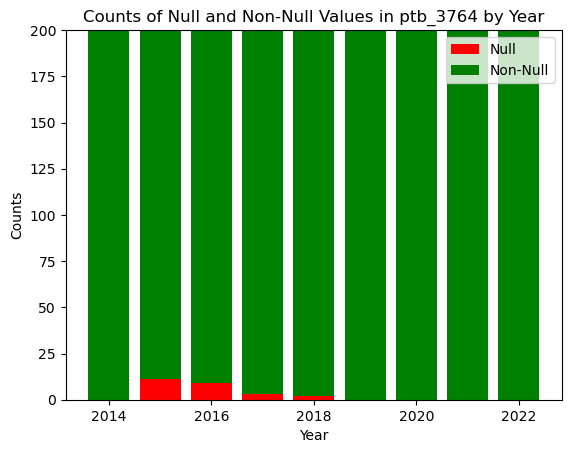

(38547, 1240)
(38547, 1239)


In [ ]:
plot_df = copy.deepcopy(df)
print("ptb_3564 null is: ",plot_df.ptb_3764.isnull().sum())

# Convert the 'ptb_3750' column to a datetime object and extract the year
plot_df['year'] = pd.to_datetime(plot_df['ptb_3750']).dt.year

# Create a new data frame with only the relevant columns
df2 = plot_df[['year', 'ptb_3764']]


null_counts = df2.groupby('year')['ptb_3764'].apply(lambda x: x.isnull().sum())
non_null_counts = df2.groupby('year')['ptb_3764'].apply(lambda x: x.notnull().sum())

# Create a bar plot with stacked bars for null and non-null counts
plt.bar(null_counts.index, null_counts, color='red', label='Null')
plt.bar(non_null_counts.index, non_null_counts, bottom=null_counts, color='green', label='Non-Null')
plt.title('Counts of Null and Non-Null Values in ptb_3764 by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()
plt.ylim(0, 200)
plt.show()

print(plot_df.shape)
print(df.shape)


In [10]:
print("miss value at baseline: ", df.ptb_3764.isnull().sum())
print("miss value after 3 months: ", df.pt3_3764.isnull().sum())

miss value at baseline:  26
miss value after 3 months:  10961


In [11]:
def drop_na_ptb3764(df):
    return df.dropna(subset=['ptb_3764'])

drop_na_ptb3764_def = drop_na_ptb3764(df)
print(drop_na_ptb3764_def.shape)


(38521, 1239)


In [12]:
def calculate_vas(df):
    dif = df.ptb_3764.values - df.pt3_3764.values
    new_df = copy.deepcopy(df)
    new_df['vasChaSco'] = dif
    return new_df

calculate_vas_def = calculate_vas(drop_na_ptb3764_def)
print(calculate_vas_def.shape)

(38521, 1240)


In [13]:
# print(calculate_vas_def.vasChaSco.to_list())
print(calculate_vas_def.vasChaSco.unique())
print("miss value after calculate VAS:", calculate_vas_def.vasChaSco.isnull().sum() )

[  6.   2.  nan  12.  -9.  11.   0.  45.  10.  24.  58.  -3.   9.  34.
 -18.  14.   8.  16.   1.  55.   5.  60.   3.  47.  41.  -4.  31. -13.
  -5.  13.  -1.  -7.  25. -36. -41. -37.  -6.  40.  18. -26.  42.  54.
  23.   7.  71.  46. -27.  44. -15.  26.  68.  15.  21. -23. -11. -77.
   4.  49.  29. -14.  38.  17.  20.  63.  37.  27.  43. -32.  19.  77.
  33.  22. -19.  -8.  32. -10.  -2.  56.  74.  39.  65.  35.  81.  51.
 -16.  36. -24.  67. -20. -22.  52.  30.  28. -57.  73.  53. -12.  69.
 -31. -61.  57. -34.  50.  64. -33. -30. -29. -75. -25.  59. -38.  48.
 -46. -17. -35. -28.  66. -40.  70. -21.  62. -50. -42. -45. -47.  72.
 -43.  76. -44.  97.  85.  75. -64.  80. -60. -62.  83. -49. -87. -52.
 -48. -56.  61. -51.  95.  78. -78.  88. -69. -39. -53.  93.  79. -81.
  94. -55. -68.  86. -59. -63. -73. -65.  84. -74. -98. -54. -89.  92.
  96.  99. -66. -72. -58.  87. -86.  82. -88. -79. -70. -71.  98. 100.
  91. -76.]
miss value after calculate VAS: 10950


In [14]:
vas_df = calculate_vas_def.dropna(subset=['vasChaSco'])
print("miss value: ", vas_df.vasChaSco.isnull().sum())
print(vas_df.shape)

miss value:  0
(27571, 1240)


In [ ]:
df = vas_df
print(df.shape)

##### KOOS qol change score change in pain score

ptb_koos_qol_score null is:  6


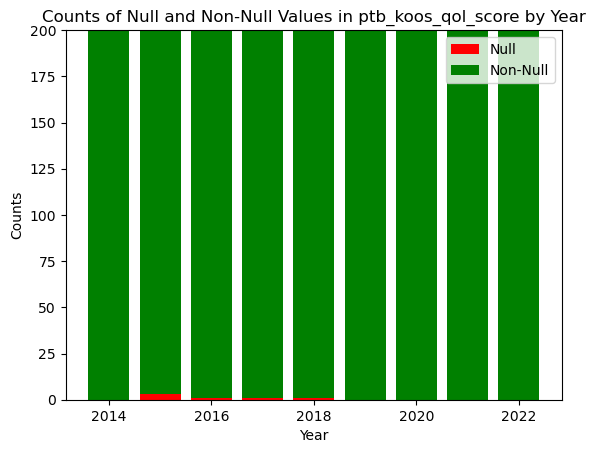

In [ ]:
plot_df = copy.deepcopy(df)

print("ptb_koos_qol_score null is: ",plot_df.ptb_koos_qol_score.isnull().sum())

# Convert the 'ptb_3750' column to a datetime object and extract the year
plot_df['year'] = pd.to_datetime(plot_df['ptb_3750']).dt.year

# Create a new data frame with only the relevant columns
df2 = plot_df[['year', 'ptb_koos_qol_score']]

null_counts = df2.groupby('year')['ptb_koos_qol_score'].apply(lambda x: x.isnull().sum())
non_null_counts = df2.groupby('year')['ptb_koos_qol_score'].apply(lambda x: x.notnull().sum())

# Create a bar plot with stacked bars for null and non-null counts
plt.bar(null_counts.index, null_counts, color='red', label='Null')
plt.bar(non_null_counts.index, non_null_counts, bottom=null_counts, color='green', label='Non-Null')
plt.title('Counts of Null and Non-Null Values in ptb_koos_qol_score by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()
plt.ylim(0, 200)
plt.show()

In [18]:
print("miss value at baseline: ", df.ptb_koos_qol_score.isnull().sum())
print("miss value after 3 months: ", df.pt3_koos_qol_score.isnull().sum())

miss value at baseline:  6
miss value after 3 months:  12


In [19]:
def drop_na_ptb_koos_qol_score(df):
    return df.dropna(subset=['ptb_koos_qol_score'])

drop_na_ptb_koos_qol_score_def =  drop_na_ptb_koos_qol_score(df)

print(drop_na_ptb_koos_qol_score_def.shape)

(27565, 1240)


In [20]:
def calculate_koos(df):
    dif = df.ptb_koos_qol_score.values - df.pt3_koos_qol_score.values
    new_df = copy.deepcopy(df)
    new_df['koosChaSco'] = dif
    return new_df

calculate_koos_def = calculate_koos(drop_na_ptb_koos_qol_score_def)
print(calculate_koos_def.shape)

(27565, 1241)


In [21]:
print("miss value after calculate KOOS: ", calculate_koos_def.koosChaSco.isnull().sum())

miss value after calculate KOOS:  12


In [22]:
koos_df = calculate_koos_def.dropna(subset=['koosChaSco']).drop(columns=['pt3_koos_qol_score'])
print(koos_df.shape)
print("miss value: ", koos_df.koosChaSco.isnull().sum())

(27553, 1240)
miss value:  0


In [ ]:
df = koos_df
print(df.shape)

In [ ]:
########## change type of variable to numeric  ####
koos_df['koosChaSco'] = pd.to_numeric(koos_df['koosChaSco'].apply(lambda x: re.sub(',', '.', str(x))))
print("is null:", koos_df.koosChaSco.isnull().sum())
print("unique: ", koos_df.koosChaSco.unique())
print("shape: ", koos_df.shape)

print(df.shape)

is null: 0
unique:  [  6.25        18.75       -12.5         -6.25        12.5
 -25.         -31.25         0.         -37.5        -43.75
  31.25        25.         -18.75       -56.25       -50.
  56.25        27.08333333  37.5        -10.41666667  43.75
  27.08333333  -4.16666667 -81.25       -62.5         68.75
  16.66666667  50.         -68.75        22.91666667 -75.        ]
shape:  (27553, 1240)


##### 40m walking change score change in pain score

testb_10391 null is:  1548


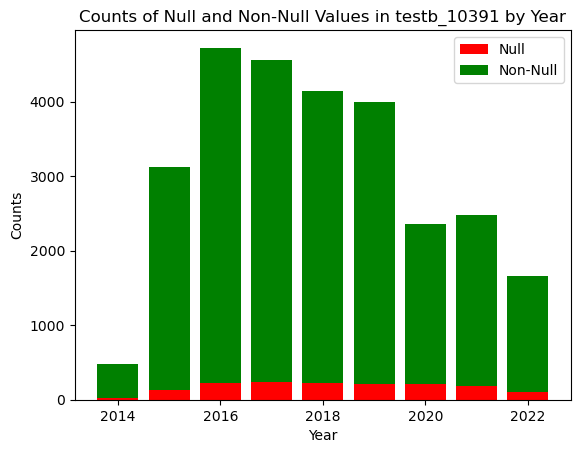

In [ ]:
plot_df = copy.deepcopy(df)

print("testb_10391 null is: ",plot_df.testb_10391.isnull().sum())

# Convert the 'ptb_3750' column to a datetime object and extract the year
plot_df['year'] = pd.to_datetime(plot_df['ptb_3750']).dt.year

# Create a new data frame with only the relevant columns
df2 = plot_df[['year', 'testb_10391']]
null_counts = df2.groupby('year')['testb_10391'].apply(lambda x: x.isnull().sum())
non_null_counts = df2.groupby('year')['testb_10391'].apply(lambda x: x.notnull().sum())

# Create a bar plot with stacked bars for null and non-null counts
plt.bar(null_counts.index, null_counts, color='red', label='Null')
plt.bar(non_null_counts.index, non_null_counts, bottom=null_counts, color='green', label='Non-Null')

plt.title('Counts of Null and Non-Null Values in testb_10391 by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [27]:
print("miss value at baseline: ", df.testb_10391.isnull().sum())
print("miss value after 3 months: ", df.test3_10391.isnull().sum())

miss value at baseline:  1548
miss value after 3 months:  7798


In [29]:
def drop_na_ptb_speed_walk(df):
    return df.dropna(subset=['testb_10391'])

drop_na_ptb_speed_walk_def = drop_na_ptb_speed_walk(df)
print(drop_na_ptb_speed_walk_def.shape)

## Sup comment: change np.nans of df.test3_10391 to zeros 


(26005, 1240)


In [ ]:
def calculate_speed_walk(df):
    dif = (40/df.testb_10391.values) - (40/df.test3_10391.values)
    new_df = copy.deepcopy(df)
    new_df['funcChaSco'] = dif
    return new_df

calculate_speed_walk_def = calculate_speed_walk(drop_na_ptb_speed_walk_def)
print(calculate_speed_walk_def.shape)

(26005, 1241)


In [31]:
print("miss value after calculate speed walk: ", calculate_speed_walk_def.funcChaSco.isnull().sum())

miss value after calculate speed walk:  6654


In [32]:
speedwalk_df = calculate_speed_walk_def.dropna(subset=['funcChaSco']).drop(columns=['test3_10391'])
print(speedwalk_df.shape)
print("miss value: ", speedwalk_df.funcChaSco.isnull().sum())

(19351, 1240)
miss value:  0


##### change type of variable to numeric

In [33]:
speedwalk_df['funcChaSco'] = pd.to_numeric(speedwalk_df['funcChaSco'].apply(lambda x: re.sub(',', '.', str(x))))
print("is null:", speedwalk_df.funcChaSco.isnull().sum())
print("unique: ", speedwalk_df.funcChaSco.unique())
print("shape: ", speedwalk_df.shape)

is null: 0
unique:  [-0.02861245 -0.21592443 -0.15959669 ... -0.14110819 -0.03651159
 -0.12296502]
shape:  (19351, 1240)


In [ ]:
df = speedwalk_df
print(df.shape)

#### VARIABLE PREPRATION

##### Calculate mean,sd,min,max,Nan

In [36]:
print(df.isna().sum().sum())

14257291


##### Exclude cases between 2016-05-13 & 2016-11-12

In [37]:
def filter_date_basedOn_ptb_3750(df):
    filtered_df = df[(df['fysb_3629'].astype("datetime64[ns]") > '2016-05-13') & (df['fysb_3629'].astype("datetime64[ns]") < '2016-11-12')].index
    return df.drop(index = filtered_df)


df = filter_date_basedOn_ptb_3750(df)
print(df.shape)


(17634, 1240)


In [38]:
def drop_fysb_3629(df):
    return df.drop(columns=['fysb_3629'])

df = drop_fysb_3629(df)

print(df.shape)

(17634, 1239)


#### Merge variables:

#####  X_ray signs, persons who did not get an x-ray ->

In [39]:
def x_ray(df):
    x_ray_ind = df[df['fysb_3637'] == 1].index.values
    df.loc[x_ray_ind, 'fysb_9349'] = 3
    df = df.drop(columns=['fysb_3637'])
    return df

df = x_ray(df)
print(df.shape)

(17634, 1238)


In [40]:
df.fysb_9349.unique()

array([ 1.,  3., nan,  2.])

##### changing chair-stand-test outcome to 0 for those who were not able to do one chair stand

In [41]:
def chair_stand(df):
    chair_stand_ind = df[df['testb_10393'] == 2].index.values
    df.loc[chair_stand_ind, 'testb_10281'] = 0
    df = df.drop(columns=['testb_10393'])
    return df
df = chair_stand(df)
print(df.shape)

(17634, 1237)


##### change NA to 0 in variables with only yes as option and Timing  

In [42]:
def pain_area(df):
    area_part_body_pain = ["ptb_15026_1",  "ptb_15026_2", "ptb_15026_3", "ptb_15026_4", "ptb_15026_5",
                 "ptb_15026_6", "ptb_15026_7", "ptb_15026_8", "ptb_15026_9", "ptb_15026_10",
                 "ptb_15026_11", "ptb_15026_12", "ptb_15026_13", "ptb_15026_14", "ptb_15026_15",
                 "ptb_15026_16", "ptb_15026_17", "ptb_15026_18", "ptb_15026_19", "ptb_15026_20",
                 "ptb_15026_21", "ptb_15026_22", "ptb_15026_23", "ptb_15026_24", "ptb_15026_25",
                 "ptb_15026_26", "ptb_15027_1",  "ptb_15027_2", "ptb_15027_3", "ptb_15027_4",
                 "ptb_15027_5", "ptb_15027_6", "ptb_15027_7", "ptb_15027_8", "ptb_15027_9",
                 "ptb_15027_10", "ptb_15027_11", "ptb_15027_12", "ptb_15027_13", "ptb_15027_14",
                 "ptb_15027_15", "ptb_15027_16", "ptb_15027_17", "ptb_15027_18", "ptb_15027_19",
                 "ptb_15027_20", "ptb_15027_21", "ptb_15027_22", "ptb_15027_23", "ptb_15027_24",
                 "ptb_15027_25", "ptb_15027_26", "ptb_15027_27", "ptb_15027_28", "ptb_15027_29",
                 "ptb_15027_30"]

    stichtag= pd.DataFrame(data={'a': ['2014-04-12']})
    stichtag = stichtag.a.astype('datetime64[ns]').values[0]
    survey_after_date = df[(df['ptb_3750'].notna()) & (df['ptb_3750'].astype('datetime64[ns]') >= stichtag)].index.values
    # survey_after_date = df['ptb_3750'].astype('datetime64') >= stichtag


    for ind, i in enumerate(area_part_body_pain):
        change_na = df[df[i].isnull()].index.values
        # change_na = df[i].isna()
        inter = list(set(survey_after_date).intersection(set(change_na)))
        # the intersection is always ZERO

        for j in inter:
           # df.loc[j][i] = 0
            df.at[j, i] = 0
        # df.loc[survey_after_date & change_na, i] = 0

    return df

In [43]:
df = pain_area(df)
df.shape

(17634, 1237)

##### creating 2 new variables pain_area and ptb_low_back

In [44]:
def new_variable_pain_area(df):
    df['pain_area'] = df.ptb_15026_1 + df.ptb_15026_2 + df.ptb_15026_3 + df.ptb_15026_4 + df.ptb_15026_5\
                      + df.ptb_15026_6 + df.ptb_15026_7 + df.ptb_15026_8 + df.ptb_15026_9 + df.ptb_15026_10+\
                      df.ptb_15026_11 + df.ptb_15026_12 + df.ptb_15026_13 + df.ptb_15026_14 + df.ptb_15026_15 +\
                      df.ptb_15026_16 + df.ptb_15026_17 + df.ptb_15026_18+ df.ptb_15026_19 + df.ptb_15026_20 +\
                      df.ptb_15026_21 + df.ptb_15026_22 + df.ptb_15026_23 + df.ptb_15026_24 + df.ptb_15026_25 +\
                      df.ptb_15026_26 + df.ptb_15027_1 + df.ptb_15027_2 + df.ptb_15027_3 + df.ptb_15027_4 +\
                      df.ptb_15027_5 + df.ptb_15027_6 + df.ptb_15027_7 + df.ptb_15027_8 + df.ptb_15027_9 +\
                      df.ptb_15027_10 + df.ptb_15027_11 + df.ptb_15027_12 + df.ptb_15027_13 + df.ptb_15027_14 +\
                      df.ptb_15027_15 + df.ptb_15027_16 + df.ptb_15027_17 + df.ptb_15027_18 + df.ptb_15027_19 +\
                      df.ptb_15027_20 + df.ptb_15027_21 + df.ptb_15027_22 + df.ptb_15027_23 + df.ptb_15027_24 +\
                      df.ptb_15027_25 + df.ptb_15027_26 + df.ptb_15027_27 + df.ptb_15027_28 + df.ptb_15027_29 +\
                      df.ptb_15027_30
    return df


def new_variable_ptb_low_back(df):

    df['ptb_low_back'] = True
    ind = df[(df['ptb_15027_13'] == 0) & (df['ptb_15027_11'] == 0) & (df['ptb_15027_14'] == 0) &
           (df['ptb_15027_21'] == 0) & (df['ptb_15027_22'] == 0) & (df['ptb_15027_12'] == 0)].index.values
    for i in ind:
        df.at[i, 'ptb_low_back'] = False


    # # df['ptb_low_back'] = df['ptb_low_back'].astype(bool)

    return df

In [45]:
df = new_variable_pain_area(df)
df.shape

(17634, 1238)

In [46]:
df = new_variable_ptb_low_back(df)
df.shape

(17634, 1239)

In [47]:
df.fysb_symptomvarighed.dtype
df.ptb_low_back.unique()

array([False,  True])

##### removing individual questions

In [48]:
def remove_individual_question_variable(df, variables_dropped):
    df = df.drop(variables_dropped, axis=1)
    return df


variables_removed = ["ptb_15026_1",  "ptb_15026_2", "ptb_15026_3", "ptb_15026_4", "ptb_15026_5",
                 "ptb_15026_6", "ptb_15026_7", "ptb_15026_8", "ptb_15026_9", "ptb_15026_10",
                 "ptb_15026_11", "ptb_15026_12", "ptb_15026_13", "ptb_15026_14", "ptb_15026_15",
                 "ptb_15026_16", "ptb_15026_17", "ptb_15026_18", "ptb_15026_19", "ptb_15026_20",
                 "ptb_15026_21", "ptb_15026_22", "ptb_15026_23", "ptb_15026_24", "ptb_15026_25",
                 "ptb_15026_26", "ptb_15027_1",  "ptb_15027_2", "ptb_15027_3", "ptb_15027_4",
                 "ptb_15027_5", "ptb_15027_6", "ptb_15027_7", "ptb_15027_8", "ptb_15027_9",
                 "ptb_15027_10", "ptb_15027_11", "ptb_15027_12", "ptb_15027_13", "ptb_15027_14",
                 "ptb_15027_15", "ptb_15027_16", "ptb_15027_17", "ptb_15027_18", "ptb_15027_19",
                 "ptb_15027_20", "ptb_15027_21", "ptb_15027_22", "ptb_15027_23", "ptb_15027_24",
                 "ptb_15027_25", "ptb_15027_26", "ptb_15027_27", "ptb_15027_28", "ptb_15027_29",
                 "ptb_15027_30"]

df = remove_individual_question_variable(df, variables_removed)

print(df.shape)

(17634, 1183)


##### creating variables per right/left knee are additional joints affected

In [49]:
def calculate_ptb_1028_5_6(df):
    df['ptb_10285_n'], df['ptb_10285_n'] = None, None
    for a in range(5, 7):
        ind1 = df[df[f"ptb_1028{a}_2"] == 1].index.values
        df.loc[ind1, f"ptb_1028{a}_n"] = 0

        for i in range(3, 6):
            ind = df[df[f"ptb_1028{a}_{i}"] == 1].index.values
            df.loc[ind, f'ptb_1028{a}_n'] = 1

    return df

def calculate_ptb_3754_b(df):
    df['ptb_3754_b'] = np.where(df['ptb_10285_n'].notna(), df['ptb_10285_n'], df['ptb_10286_n'])
    # 1 means no additonnal joint is affected and 2 means there are more than one joint affected
    # change to do you have additional effected joints? 1= yes 0 = no
    df.loc[df['ptb_3754_b'] == 1, 'ptb_3754_b'] = 0
    df.loc[df['ptb_3754_b'] == 2, 'ptb_3754_b'] = 1
    # change to boolean
    df['ptb_3754_b'] = df['ptb_3754_b'].astype(bool)
    return df


def remove_irrelevant_variable(df):
    columns_to_remove = ['ptb_10285_n', 'ptb_10286_n', 'ptb_3754', 'ptb_10286_2', 'ptb_10286_3', 'ptb_10286_4',
                         'ptb_10286_5', 'ptb_10285_2', 'ptb_10285_3', 'ptb_10285_4', 'ptb_10285_5']
    df = df.drop(columns_to_remove, axis=1)
    return df

In [50]:
df = calculate_ptb_1028_5_6(df)
df = calculate_ptb_3754_b(df)
df = remove_irrelevant_variable(df)
df.shape

(17634, 1175)

##### variable ptb_3792 Frequency of pain until exaustin making binary cut after once a week

In [ ]:
def calculate_ptb_3792_b(df):
    category_type_ptb_3792 = df['ptb_3792'].astype('category')

    # replace values in column 'ptb_3792_b'
    df.loc[df['ptb_3792'] == 1, 'ptb_3792_b'] = 0
    df.loc[df['ptb_3792'] == 2, 'ptb_3792_b'] = 0
    df.loc[df['ptb_3792'] == 3, 'ptb_3792_b'] = 0
    df.loc[df['ptb_3792'] == 4, 'ptb_3792_b'] = 0
    df.loc[df['ptb_3792'] == 5, 'ptb_3792_b'] = 1
    df.loc[df['ptb_3792'] == 6, 'ptb_3792_b'] = 1
    df.loc[df['ptb_3792'] == 7, 'ptb_3792_b'] = 1

    df['ptb_3792_b'] = df['ptb_3792_b'].astype('bool')
    df = df.drop('ptb_3792', axis=1)

    return df

In [52]:
df = calculate_ptb_3792_b(df)
df.shape

(17634, 1175)

##### variable ptb_3777 regarding the working status

In [ ]:
def calculate_ptb_3777_b(df):
    category_type_ptb_3777_b = df['ptb_3777'].astype('category')

    # dichotomize variable in are you working or studying yes(1)
    df.loc[df['ptb_3777'] == 1, 'ptb_3777_b'] = 1
    df.loc[df['ptb_3777'] == 2, 'ptb_3777_b'] = 0
    df.loc[df['ptb_3777'] == 3, 'ptb_3777_b'] = 0
    df.loc[df['ptb_3777'] == 4, 'ptb_3777_b'] = 0
    df.loc[df['ptb_3777'] == 5, 'ptb_3777_b'] = 0
    df.loc[df['ptb_3777'] == 6, 'ptb_3777_b'] = 0
    df.loc[df['ptb_3777'] == 7, 'ptb_3777_b'] = 0

    df['ptb_3777_b'] = df['ptb_3777_b'].astype(bool)
    df = df.drop('ptb_3777', axis=1)
    return df

In [54]:
df = calculate_ptb_3777_b(df)
df.shape

(17634, 1175)

In [ ]:
# !!!! **** we dont have ptb_3761 (Old version). alternative is ptb_koospain_1  ****
def calculate_ptb_koospain_1(df):
    category_type_ptb_koospain = df['ptb_koospain_1'].astype('category')

    # dichotomize data in do you have pain every day? yes(1)
    df.loc[df['ptb_koospain_1'] == 0, 'ptb_koospain'] = 0
    df.loc[df['ptb_koospain_1'] == 1, 'ptb_koospain'] = 0
    df.loc[df['ptb_koospain_1'] == 2, 'ptb_koospain'] = 0
    df.loc[df['ptb_koospain_1'] == 3, 'ptb_koospain'] = 1
    df.loc[df['ptb_koospain_1'] == 4, 'ptb_koospain'] = 1

    df['ptb_koospain'] = df['ptb_koospain'].astype(bool)
    df = df.drop('ptb_koospain_1', axis=1)

    return df

In [56]:
df = calculate_ptb_koospain_1(df)
df.shape

(17634, 1175)

In [ ]:
def calculate_ptb_10226_b(df):
    category_type_ptb_10226_b = df['ptb_10226'].astype('category')

    # dichotomize data in do you have a higher eductaion than secondary education
    df['ptb_10226_b'] = 0
    df.loc[df['ptb_10226'] == 3, 'ptb_10226_b'] = 1
    df.loc[df['ptb_10226'] == 4, 'ptb_10226_b'] = 1
    df.loc[df['ptb_10226'] == 5, 'ptb_10226_b'] = 1

    df['ptb_10226_b'] = df['ptb_10226_b'].astype(bool)
    df = df.drop('ptb_10226', axis=1)

    return df

In [58]:
df = calculate_ptb_10226_b(df)
df.shape

(17634, 1175)

##### sick-leave - have you been on sick leave -> delete information on how long have on sick listed / recode 2 to 0 as no

In [59]:
def sick_leave_ptb_3772(df):
    df.loc[df['ptb_3772'] == 2, 'ptb_3772'] = 0
    df.drop('ptb_3776', axis=1, inplace=True)
    return df

df = sick_leave_ptb_3772(df)
df.shape

(17634, 1174)

#### Changing types of variables

##### change 2 to 0 in binary variables

In [60]:
def change_type_variable(df):
    binary_variables_need_change = ['fysb_3639', 'fysb_3642', 'fysb_op', 'ptb_3772', 'ptb_11836',
                                    'testb_10392', 'ptb_10223', 'ptb_10224', 'ptb_10225', 'ptb_13118',
                                    'ptb_15553', 'ptb_15554', 'ptb_15555', 'ptb_15556', 'ptb_15557',
                                    'ptb_15558', 'ptb_15559', 'ptb_15560', 'ptb_15561', 'ptb_15562',
                                    'ptb_15563', 'ptb_15564', 'ptb_16316', 'ptb_3758', 'ptb_3760',
                                    'ptb_3762', 'ptb_3765']


    for i in binary_variables_need_change:
        ind = df[df[i] == 2].index.values
        for ii in ind:
            df.at[ii, i] = 0
    return df

df = change_type_variable(df)
df.shape

(17634, 1174)

##### change NA to 0 in variables with only yes as option and no timig

In [61]:
def change_na_to_0(df):
    change_variable_NA_0 = ['fysb_medicin']

    for i in change_variable_NA_0:
        for ii in df[df[i].isnull()].index.values:
            df.at[ii, i] = 0
    return df

df = change_na_to_0(df)
df.shape

(17634, 1174)

 ##### Change type of variables accordingly #############

In [ ]:
### Saved as a Integer/Nummeric variable ###
### Point! ptb_4145 in previouse study paper is ptb_ucla and ptb_eq5d_vas in previous study is ptb_15240

def change_integerNummeric (df):

    c = ['age', 'ptb_3764', 'testb_10281', 'ptb_4145', "ptb_eq5d_vas"]
    for i in c:
        df[i] = pd.to_numeric(df[i])

        # print(df[i].unique())
        # print(df[i].dtype)

        # print(df[i].astype('Int32').unique())
        # print(df[i].astype('Floa32').dtype)
        # df[i] = df[i].astype(int)
    return df
df=change_integerNummeric (df)


##### Save and change as a NUMMERIC variable  ###

In [63]:
# Change all `False` values to 0
def change_variables_to_nummeric(df):
    NumVar = ["fysb_BMI", "ptb_koos_qol_score", "ptb_eq5d_score_5l",
              "testb_10391", "ptb_ases_pain_score", "ptb_ases_other_score", "ptb_sf12_pcs",
              "ptb_sf12_mcs", "vasChaSco"]
    for i in NumVar:
        # print(df[i].dtypes)
        # print(df[i].unique())        
        # print(pd.to_numeric(df[i]).unique())
        df[i] = pd.to_numeric(df[i])
    return df


df = change_variables_to_nummeric(df)


##### Save and change as a FACTOR/categroies variable  ###

In [65]:
def change_variable_to_categorical(df):
    df["fysb_9349"] = df["fysb_9349"].astype(str).astype("category")
    return df

df = change_variable_to_categorical(df)
df.shape

(17634, 1174)

##### Save and change as a BINARY/LOGICAL variable ###

In [67]:
def change_variables_to_binary_logical(df):
    df['ptb_32260'] = df['ptb_32260'].map({1: True, 2: False})
    logVar = ['fysb_3639', 'testb_10392', 'ptb_13118', 'ptb_15553', 'ptb_15554', "ptb_15555",
    "ptb_15556", "ptb_15557", "ptb_15558", "ptb_15559", "ptb_15560",
    "ptb_15561", "ptb_15562", "ptb_15563", "ptb_15564", "ptb_16316", "ptb_3758", "ptb_3760",
    "ptb_3762", "ptb_3765", "ptb_32260", "ptb_10223", "ptb_10224", "ptb_10225", "ptb_3772",
    "ptb_11836", "fysb_3642", "fysb_medicin", "fysb_op" ]
            #10225: 1 Living alone 2 Living with others (partner, family, friends or others) ==> are you alone: 1 = Yes = True
            # gender: are you male?: 1=yes =True, 2=No=False
    
    for i in logVar:    
        df[i] = df[i].astype('boolean')
        

    return df

df = change_variables_to_binary_logical(df)


Gender:

In [69]:
df['gender'] = df['gender'].replace(2, 0)
df.gender.value_counts()

gender
0    12420
1     5214
Name: count, dtype: int64

0: Female
1: Male

##### Checking missing value in Outcome variables:

In [70]:
outcome_variable = ["vasChaSco", "koosChaSco", "funcChaSco"]

# Count the number of missing values in all three columns
missing_values = df[outcome_variable].isnull().sum().sum()

print(f"There are {missing_values} missing values in the outcome variables.")


There are 0 missing values in the outcome variables.


#### list of ALL variables ()

In [71]:
df.shape

(17634, 1174)

In [72]:
# Group 1: All variables still collected after 2023 (excluding information on diseases) 
group1 = ["ptb_11836", "fysb_3639", "ptb_3764", "fysb_symptomvarighed", "ptb_eq5d_score_5l", "testb_10391", "fysb_BMI", "age", 
          "ptb_eq5d_vas", "pain_area", "testb_10281", "ptb_koos_qol_score", "ptb_4145", "ptb_3765", "ptb_10226_b", "ptb_16316", 
          "ptb_koospain", "fysb_9349", "fysb_3642", "ptb_low_back", "ptb_3792_b", "gender", "fysb_op", "ptb_10225", "ptb_3758", 
          "ptb_3762", "ptb_13118", "fysb_medicin", "ptb_3777_b", "ptb_3772", "ptb_10223", "testb_10392", "ptb_10224", "ptb_3754_b", 
          "vasChaSco", "koosChaSco", "funcChaSco", "pt3_3764"]
print("group1:", len(group1))

# Group 2: All Green variables
group2 = ["ptb_11836", "fysb_3639", "ptb_3764", "fysb_symptomvarighed", "ptb_eq5d_score_5l", "testb_10391", "fysb_BMI", "age", "ptb_eq5d_vas", 
          "pain_area", "testb_10281", "ptb_koos_qol_score", "ptb_4145", "ptb_3765", "ptb_10226_b", "ptb_16316", "ptb_koospain", "fysb_9349", 
          "fysb_3642", "ptb_low_back", "ptb_3792_b", "gender", "fysb_op", "ptb_10225", "ptb_3758", "ptb_3762", "ptb_13118", "fysb_medicin", 
          "ptb_3777_b", "ptb_3772", "ptb_10223", "testb_10392", "ptb_10224", "ptb_3754_b", "fysb_24607", 
          "fysb_24643", "fysb_24644", "fysb_24608", "fysb_24645", "fysb_24646", "fysb_24649", "fysb_24650", "fysb_24651",
          "vasChaSco", "koosChaSco", "funcChaSco"]
print("group2:",len(group2))

# Group 3: All Green variables with 3 koos
group3 = ["ptb_11836", "fysb_3639", "ptb_3764", "fysb_symptomvarighed", "ptb_eq5d_score_5l", "testb_10391", "fysb_BMI", "age", "ptb_eq5d_vas", 
          "pain_area", "testb_10281", "ptb_koos_qol_score", "ptb_4145", "ptb_3765", "ptb_10226_b", "ptb_16316", "ptb_koospain", "fysb_9349", 
          "fysb_3642", "ptb_low_back", "ptb_3792_b", "gender", "fysb_op", "ptb_10225", "ptb_3758", "ptb_3762", "ptb_13118", "fysb_medicin", 
          "ptb_3777_b", "ptb_3772", "ptb_10223", "testb_10392", "ptb_10224", "ptb_3754_b","fysb_24607", 
          "fysb_24643", "fysb_24644", "fysb_24608", "fysb_24645", "fysb_24646", "fysb_24649", "fysb_24650", "fysb_24651",
          "ptb_koos_pain_score", "ptb_koos_func_score", "ptb_koos12_score",
          "vasChaSco", "koosChaSco", "funcChaSco" ]
print("group3:", len(group3))

group1: 38
group2: 46
group3: 49


##### Checking mising value:

In [73]:
df_group1 = df[group1]
print("shape group1:", df_group1.shape)
df_group2 = df[group2]
print("shape group2:", df_group2.shape)
df_group3 = df[group3]
print("shape group3:", df_group3.shape)

shape group1: (17634, 38)
shape group2: (17634, 46)
shape group3: (17634, 49)


##### Cheking percentage of missing value for each column in each Group:

In [ ]:
dataframes = [df_group1, df_group2, df_group3]
dataframe_names = ['df_group1', 'df_group2', 'df_group3']

for df, name in zip(dataframes, dataframe_names):
    total_rows = len(df)
    missing_percentage = (df.isnull().sum() / total_rows) * 100
    print(f"Missing Value Percentages in {name}:")
    print(missing_percentage)
    print("\n")


Missing Value Percentages in df_group1:
ptb_11836                3.810820
fysb_3639               19.564478
ptb_3764                 0.000000
fysb_symptomvarighed     0.277872
ptb_eq5d_score_5l        0.039696
testb_10391              0.000000
fysb_BMI                 0.465011
age                      0.000000
ptb_eq5d_vas             0.017013
pain_area                0.000000
testb_10281              0.017013
ptb_koos_qol_score       0.000000
ptb_4145                 0.028354
ptb_3765                 0.056709
ptb_10226_b              0.000000
ptb_16316                0.017013
ptb_koospain             0.000000
fysb_9349                0.000000
fysb_3642                0.000000
ptb_low_back             0.000000
ptb_3792_b               0.000000
gender                   0.000000
fysb_op                  0.000000
ptb_10225                0.011342
ptb_3758                 0.022683
ptb_3762                 0.011342
ptb_13118                0.022683
fysb_medicin             0.000000
ptb_3777

In [75]:
df_group1.isna().sum().sum()

4313

##### Clear missing value in 3 Groups:

In [ ]:
df_cleaned_g1 = df_group1.dropna()
df_cleaned_g2 = df_group2.dropna()
df_cleaned_g3 = df_group3.dropna()

print("Shape of df_cleaned_g1:", df_cleaned_g1.shape)
print("Shape of df_cleaned_g2:", df_cleaned_g2.shape)
print("Shape of df_cleaned_g3:", df_cleaned_g3.shape)


Shape of df_cleaned_g1: (14037, 38)
Shape of df_cleaned_g2: (8747, 46)
Shape of df_cleaned_g3: (4941, 49)


In [77]:
df_cleaned_g1.fysb_9349.unique()

['1.0', '3.0', 'nan', '2.0']
Categories (4, object): ['1.0', '2.0', '3.0', 'nan']

##### Remove missing value for fysb_9349

In [78]:
df_cleaned_g1.to_csv("test1.csv", sep=',')
df_cleaned_g2.to_csv("test2.csv", sep=',')
df_cleaned_g3.to_csv("test3.csv", sep=',')

In [79]:
df1 = pd.read_csv("test1.csv", sep=',').drop('Unnamed: 0', axis=1)
print("df1 shape" ,df1.shape)
df2 = pd.read_csv("test2.csv", sep=',').drop('Unnamed: 0', axis=1)
print("df2 shape" ,df2.shape)
df3 = pd.read_csv("test3.csv", sep=',').drop('Unnamed: 0', axis=1)
print("df3 shape" ,df3.shape)

df1 shape (14037, 38)
df2 shape (8747, 46)
df3 shape (4941, 49)


In [80]:
print(df1.fysb_9349.unique())
print(df2.fysb_9349.unique())
print(df3.fysb_9349.unique())

[ 1.  3. nan  2.]
[ 1.  3. nan  2.]
[ 1.  2. nan  3.]


In [81]:
print(df1.fysb_9349.unique())
print(df2.fysb_9349.unique())
print(df3.fysb_9349.unique())

[ 1.  3. nan  2.]
[ 1.  3. nan  2.]
[ 1.  2. nan  3.]


In [82]:
print(df1.isna().sum().sum())
print(df2.isna().sum().sum())
print(df3.isna().sum().sum())

106
53
33


In [83]:
df1 = df1.dropna()
print(df1.fysb_9349.unique())
df2 = df2.dropna()
print(df2.fysb_9349.unique())
df3 = df3.dropna()
print(df3.fysb_9349.unique())

[1. 3. 2.]
[1. 3. 2.]
[1. 2. 3.]


In [84]:
print(df1.fysb_9349.unique()) 
print(df2.fysb_9349.unique()) 
print(df3.fysb_9349.unique()) 

[1. 3. 2.]
[1. 3. 2.]
[1. 2. 3.]


In [85]:
df1.isna().sum().sum()
df2.isna().sum().sum()
df3.isna().sum().sum()


0

In [86]:
print(df1.fysb_9349.isna().sum() )
temp1=df1.dropna()
# print(temp1.fysb_9349.unique())
# ind = df1[df1['fysb_9349'] == 'nan'].index
# print(ind)
# temp1=df1.drop(ind)
print(temp1.fysb_9349.unique())

0
[1. 3. 2.]


In [87]:
df1.to_csv("group1.csv", sep=',', index=False)
df2.to_csv("group2.csv", sep=',', index=False)
df3.to_csv("group3.csv", sep=',', index=False)

In [88]:
df1 = pd.read_csv("group1.csv", sep=',')
df1

,ptb_11836,fysb_3639,ptb_3764,fysb_symptomvarighed,ptb_eq5d_score_5l,testb_10391,fysb_BMI,age,ptb_eq5d_vas,pain_area,...,ptb_3777_b,ptb_3772,ptb_10223,testb_10392,ptb_10224,ptb_3754_b,vasChaSco,koosChaSco,funcChaSco,pt3_3764
0,False,False,38.0,48.0,0.911,25.59,25.08,66,90.0,2.0,...,False,False,True,False,True,False,2.0,18.75,-0.028612,36.0
1,False,False,63.0,3.0,0.360,26.00,31.44,55,57.0,10.0,...,False,False,True,False,True,False,2.0,-12.50,-0.215924,61.0
2,True,False,30.0,300.0,0.819,27.77,25.46,68,70.0,5.0,...,False,False,True,False,True,False,12.0,-12.50,-0.159597,18.0
3,False,False,59.0,120.0,0.097,22.89,34.09,53,50.0,2.0,...,False,False,True,False,True,False,45.0,-12.50,0.003048,14.0
4,False,False,30.0,6.0,0.911,27.80,26.09,65,84.0,6.0,...,False,False,True,False,True,False,10.0,6.25,-0.189816,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,False,False,57.0,220.0,0.332,21.99,30.07,66,59.0,0.0,...,False,False,True,False,True,False,24.0,-18.75,-0.162170,33.0
13927,False,False,60.0,24.0,0.825,27.00,24.49,73,69.0,8.0,...,False,False,True,False,True,False,36.0,0.00,0.080431,24.0
13928,False,False,34.0,12.0,0.767,19.80,26.15,67,81.0,4.0,...,False,False,True,False,True,False,34.0,-31.25,-0.171579,0.0
13929,False,False,79.0,8.0,0.288,30.77,25.13,68,91.0,3.0,...,False,False,True,False,True,False,26.0,-6.25,0.040522,53.0


In [89]:
df_included = df1

In [90]:
df2 = pd.read_csv("group2.csv", sep=',')
df2

,ptb_11836,fysb_3639,ptb_3764,fysb_symptomvarighed,ptb_eq5d_score_5l,testb_10391,fysb_BMI,age,ptb_eq5d_vas,pain_area,...,fysb_24644,fysb_24608,fysb_24645,fysb_24646,fysb_24649,fysb_24650,fysb_24651,vasChaSco,koosChaSco,funcChaSco
0,False,False,53.0,120.0,0.819,24.22,43.70,67,80.0,4.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,-4.0,25.00,-0.064474
1,False,False,32.0,12.0,0.952,23.05,32.27,67,69.0,4.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.00,0.000000
2,False,False,49.0,6.0,0.839,29.12,24.44,73,90.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,18.0,0.00,-0.079334
3,True,False,67.0,60.0,0.251,34.20,25.71,77,21.0,2.0,...,1.0,1.0,1.0,2.0,2.0,2.0,1.0,32.0,6.25,-0.037774
4,False,False,60.0,120.0,0.819,25.84,21.45,59,90.0,4.0,...,1.0,1.0,2.0,2.0,1.0,2.0,1.0,29.0,-18.75,-0.161414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,False,False,57.0,220.0,0.332,21.99,30.07,66,59.0,0.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,24.0,-18.75,-0.162170
8690,False,False,60.0,24.0,0.825,27.00,24.49,73,69.0,8.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,36.0,0.00,0.080431
8691,False,False,34.0,12.0,0.767,19.80,26.15,67,81.0,4.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,34.0,-31.25,-0.171579
8692,False,False,79.0,8.0,0.288,30.77,25.13,68,91.0,3.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,26.0,-6.25,0.040522


In [91]:
df3 = pd.read_csv("group3.csv", sep=',')
df3

,ptb_11836,fysb_3639,ptb_3764,fysb_symptomvarighed,ptb_eq5d_score_5l,testb_10391,fysb_BMI,age,ptb_eq5d_vas,pain_area,...,fysb_24646,fysb_24649,fysb_24650,fysb_24651,ptb_koos_pain_score,ptb_koos_func_score,ptb_koos12_score,vasChaSco,koosChaSco,funcChaSco
0,False,False,67.0,2.0,0.288,59.15,38.73,62,49.0,0.0,...,1.0,2.0,2.0,1.0,18.75,18.75,25.000000,8.0,-6.25,-0.348868
1,False,False,36.0,26.0,0.878,24.79,25.74,49,71.0,0.0,...,2.0,2.0,1.0,2.0,68.75,68.75,60.416667,29.0,-25.00,-0.189060
2,False,False,75.0,9.0,0.538,43.65,37.83,60,47.0,0.0,...,1.0,2.0,1.0,2.0,43.75,37.50,33.333333,25.0,-18.75,-0.207215
3,False,False,75.0,1.0,0.832,26.00,33.42,54,80.0,0.0,...,2.0,2.0,2.0,2.0,25.00,50.00,39.583333,48.0,-12.50,0.109890
4,True,False,9.0,7.0,0.878,25.66,31.37,54,78.0,0.0,...,2.0,1.0,1.0,2.0,50.00,68.75,58.333333,-3.0,31.25,0.027453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,False,False,57.0,220.0,0.332,21.99,30.07,66,59.0,0.0,...,2.0,1.0,2.0,1.0,62.50,43.75,43.750000,24.0,-18.75,-0.162170
4904,False,False,60.0,24.0,0.825,27.00,24.49,73,69.0,8.0,...,2.0,2.0,2.0,2.0,37.50,56.25,47.916667,36.0,0.00,0.080431
4905,False,False,34.0,12.0,0.767,19.80,26.15,67,81.0,4.0,...,2.0,2.0,2.0,2.0,50.00,81.25,62.500000,34.0,-31.25,-0.171579
4906,False,False,79.0,8.0,0.288,30.77,25.13,68,91.0,3.0,...,1.0,2.0,1.0,2.0,25.00,43.75,37.500000,26.0,-6.25,0.040522


In [95]:
numeric_variable = [
    "ptb_3764", "fysb_symptomvarighed", "ptb_eq5d_score_5l", "testb_10391", "fysb_BMI", "age", 
    "ptb_eq5d_vas", "pain_area", "testb_10281", "ptb_koos_qol_score", "ptb_4145","vasChaSco"
]
binary_category_variables = [
    "ptb_11836", "fysb_3639", "ptb_3765", "ptb_10226_b", "ptb_16316",
    "ptb_koospain", "fysb_9349", "fysb_3642", "ptb_low_back", "ptb_3792_b", "gender", "fysb_op", "ptb_10225", "ptb_3758",
    "ptb_3762", "ptb_13118", "fysb_medicin", "ptb_3777_b", "ptb_3772", "ptb_10223", "testb_10392", "ptb_10224", "ptb_3754_b",
    
]

In [96]:
numerical_meta = {}
for c_name in numeric_variable:
    target_column =  df1[c_name]
    numerical_meta[c_name] = {
        "mean":target_column.mean(),
        "std": target_column.std(),
        "min": target_column.min(), 
        "max": target_column.max(),
        # "data-type": target_column.dtype,
        # "median": target_column.median(),
       
     }
for i, (k, v) in enumerate(numerical_meta.items(), 1):
    print(f"{i}. {k}: {v}")

1. ptb_3764: {'mean': 46.40693417557964, 'std': 21.66257932831825, 'min': 0.0, 'max': 100.0}
2. fysb_symptomvarighed: {'mean': 40.547484028425814, 'std': 64.10494208231172, 'min': 0.0, 'max': 756.0}
3. ptb_eq5d_score_5l: {'mean': 0.7824159069700667, 'std': 0.1801050738694662, 'min': -0.5050000000000001, 'max': 1.0}
4. testb_10391: {'mean': 28.236840140693417, 'std': 7.691171487129642, 'min': 10.0, 'max': 234.91}
5. fysb_BMI: {'mean': 28.658157346924124, 'std': 5.291197319499265, 'min': 15.23, 'max': 70.03}
6. age: {'mean': 65.33364439020889, 'std': 9.28680458899114, 'min': 23, 'max': 94}
7. ptb_eq5d_vas: {'mean': 70.53441963965257, 'std': 18.54506210515478, 'min': 0.0, 'max': 100.0}
8. pain_area: {'mean': 2.789247003086641, 'std': 3.255623322215988, 'min': 0.0, 'max': 40.0}
9. testb_10281: {'mean': 11.972076663556098, 'std': 3.7007608482391205, 'min': 0.0, 'max': 40.0}
10. ptb_koos_qol_score: {'mean': 46.175047256717626, 'std': 15.125137404318727, 'min': 0.0, 'max': 100.0}
11. ptb_4145

In [97]:
categorical_meta = {}
for c_name in binary_category_variables:
    target_column =  df1[c_name]
    categorical_meta[c_name] = {
        "data-type": target_column.dtype,
        "True": (target_column == True).sum(),
        "False": (target_column == False).sum(),
        "nan": (target_column.isnull()).sum()
        # "unique": np.unique(target_column.values, return_counts=True), 
        
     }
for i, (k, v) in enumerate(categorical_meta.items(), 1):
    print(f"{i}. {k}: {v}")

1. ptb_11836: {'data-type': dtype('bool'), 'True': 1252, 'False': 12679, 'nan': 0}
2. fysb_3639: {'data-type': dtype('bool'), 'True': 207, 'False': 13724, 'nan': 0}
3. ptb_3765: {'data-type': dtype('bool'), 'True': 1549, 'False': 12382, 'nan': 0}
4. ptb_10226_b: {'data-type': dtype('bool'), 'True': 9895, 'False': 4036, 'nan': 0}
5. ptb_16316: {'data-type': dtype('bool'), 'True': 7063, 'False': 6868, 'nan': 0}
6. ptb_koospain: {'data-type': dtype('bool'), 'True': 11214, 'False': 2717, 'nan': 0}
7. fysb_9349: {'data-type': dtype('float64'), 'True': 11079, 'False': 0, 'nan': 0}
8. fysb_3642: {'data-type': dtype('bool'), 'True': 4644, 'False': 9287, 'nan': 0}
9. ptb_low_back: {'data-type': dtype('bool'), 'True': 2690, 'False': 11241, 'nan': 0}
10. ptb_3792_b: {'data-type': dtype('bool'), 'True': 6972, 'False': 6959, 'nan': 0}
11. gender: {'data-type': dtype('int64'), 'True': 4085, 'False': 9846, 'nan': 0}
12. fysb_op: {'data-type': dtype('bool'), 'True': 3790, 'False': 10141, 'nan': 0}
13.

In [ ]:
df1['improvement'] = df1['pt3_3764'] - df1['ptb_3764']
# Calculate the average improvement
average_improvement = df1['improvement'].mean()

print("Average Improvement in Pain:", average_improvement)


Average Improvement in Pain: -14.066039767425167


In [99]:
average_improvement = np.mean(df1['improvement'])
average_improvement 

-14.066039767425167

In [100]:
total_improvement = df1['improvement'].sum()
count_improvement = df1['improvement'].count()
average_improvement = total_improvement / count_improvement
average_improvement 

-14.066039767425167